# Initial data


In [58]:
%matplotlib notebook
from roboticstoolbox import DHRobot, RevoluteDH
import roboticstoolbox as rtb
from math import pi
from spatialmath import SE3
#link1
m1 = 1
#link2
m2 = 1
#link3
m3 = 1
#link4
m4 = 1
#link5
m5 = 1
#link6
m6 = 1
l6 = 0
#link7
m7=1
#link8
m8=1
g = 9.81 # gravity
L1 = RevoluteDH(m=m1, a=13.92, alpha=-pi/2, d=40.28, qlim=[0, 2*pi])
L2 = RevoluteDH(offset=-pi/2, m=m2, d=0 , alpha=0, a=0, qlim=[0, 2*pi])
L3 = RevoluteDH(m=m3, d=2.83, alpha=pi/2, a=119.97, qlim=[0, 2*pi])
L4 = RevoluteDH(offset=-pi/2,m=m4, d=-5.5, alpha=-pi/2, a=89.75, qlim=[0, 2*pi])
L5 = RevoluteDH(offset=pi/2,m=m5, d=0, alpha=0, a=0, qlim=[0, 2*pi])
L6 = RevoluteDH(m=m6, d=28, alpha=pi/2, a=14.07, qlim=[0, 2*pi])
L7 = RevoluteDH(offset=-pi/2,m=m7, d=0, alpha=-pi/2, a=l6, qlim=[0, 2*pi])
L8 = RevoluteDH(m=m8, d=-9.25, alpha=pi/2, a=38, qlim=[0, 2*pi])

robot1 = DHRobot([L1,L2,L3,L4,L5,L6,L7,L8], gravity=[0, 0, g], name="Robot")
print(robot1) # shows dh table

DHRobot: Robot, 8 joints (RRRRRRRR), dynamics, standard DH parameters
┌──────────┬───────┬───────┬────────┬──────┬────────┐
│   θⱼ     │  dⱼ   │  aⱼ   │   ⍺ⱼ   │  q⁻  │   q⁺   │
├──────────┼───────┼───────┼────────┼──────┼────────┤
│ q1       │ 40.28 │ 13.92 │ -90.0° │ 0.0° │ 360.0° │
│ q2 - 90° │     0 │     0 │   0.0° │ 0.0° │ 360.0° │
│ q3       │  2.83 │   120 │  90.0° │ 0.0° │ 360.0° │
│ q4 - 90° │  -5.5 │ 89.75 │ -90.0° │ 0.0° │ 360.0° │
│ q5 + 90° │     0 │     0 │   0.0° │ 0.0° │ 360.0° │
│ q6       │    28 │ 14.07 │  90.0° │ 0.0° │ 360.0° │
│ q7 - 90° │     0 │     0 │ -90.0° │ 0.0° │ 360.0° │
│ q8       │ -9.25 │    38 │  90.0° │ 0.0° │ 360.0° │
└──────────┴───────┴───────┴────────┴──────┴────────┘

┌─┬──┐
└─┴──┘



<IPython.core.display.Javascript object>


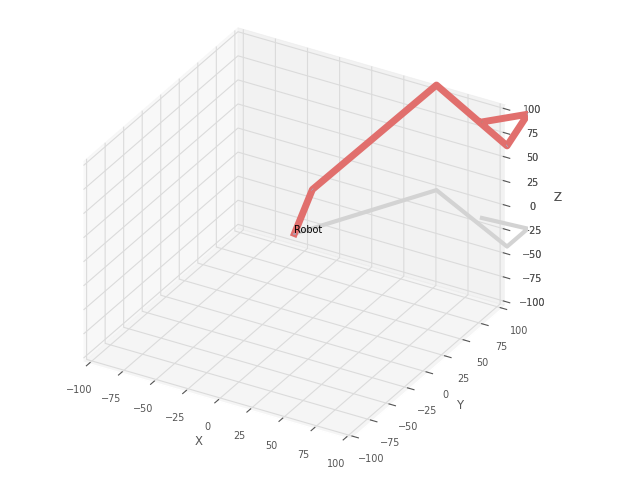

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'Robot')

In [59]:
robot1.addconfiguration('q_init', [0,0,0,0,0,0,0,0])
robot1.plot(robot1.configs['q_init'],limits=[-100, 100, -100, 100,-100, 100])


<IPython.core.display.Javascript object>


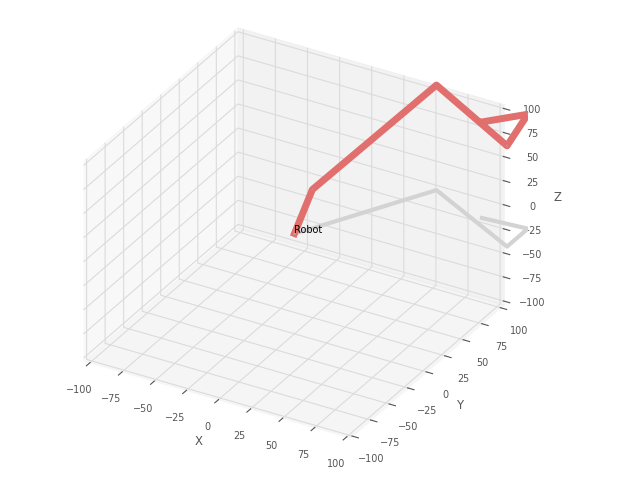

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'Robot')

In [62]:
robot1.addconfiguration('q_end', [pi/3,pi/4,pi/18,0,pi/5,pi/4,pi/3,0])
robot1.plot(robot1.configs['q_end'],limits=[-100, 100, -100, 100,-100, 100])

<IPython.core.display.Javascript object>


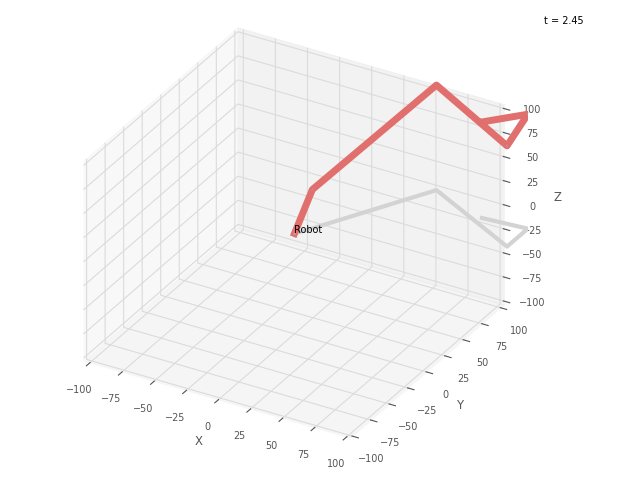

PyPlot3D backend, t = 2.499999999999999, scene:
  robot: Text(0.0, 0.0, 'Robot')

In [63]:
qt1 = rtb.jtraj(robot1.configs['q_init'], robot1.configs['q_end'], 50)
robot1.plot(qt1.q,limits=[-100, 100, -100, 100,-100, 100])

In [65]:
import matplotlib.pyplot as plt
import numpy as np
theta1=[]
theta2=[]
theta3=[]
theta4=[]
theta5=[]
theta6=[]
x=[]
y=[]
z=[]
time=list(range(50))
for i in range(50):
    theta1.append(qt1.q[i][0])
    theta2.append(qt1.q[i][1])
    theta3.append(qt1.q[i][2])
    theta4.append(qt1.q[i][3])
    theta5.append(qt1.q[i][4])
    theta6.append(qt1.q[i][5])
    T = robot1.fkine(qt1.q[i])
    position = T.t
    x.append(position[0])
    y.append(position[1])
    z.append(position[2])


<IPython.core.display.Javascript object>


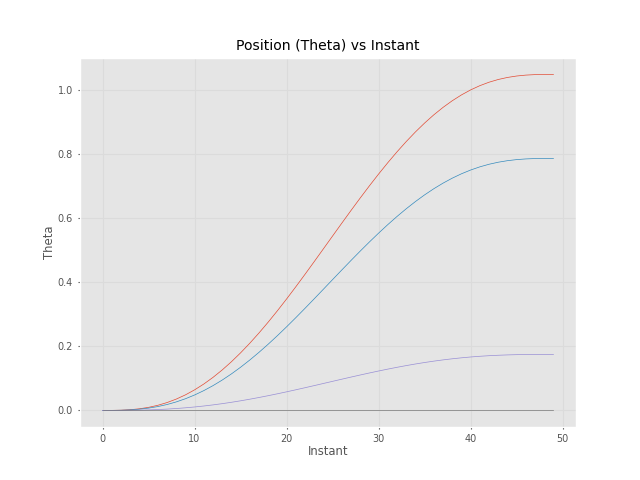

In [70]:
plt.plot(time, theta1)
plt.xlabel('Instant')
plt.ylabel('Theta1')
plt.title('Position (Theta1) vs Instant')
plt.show()

In [71]:
plt.plot(time, theta2)
plt.xlabel('Instant')
plt.ylabel('Theta2')
plt.title('Position (Theta2) vs Instant')
plt.show()


In [72]:
plt.plot(time, theta3)
plt.xlabel('Instant')
plt.ylabel('Theta3')
plt.title('Position (theta3) vs Instant')
plt.show()


In [73]:
plt.plot(time, theta4)
plt.xlabel('Instant')
plt.ylabel('Theta')
plt.title('Position (Theta) vs Instant')
plt.show()


<IPython.core.display.Javascript object>


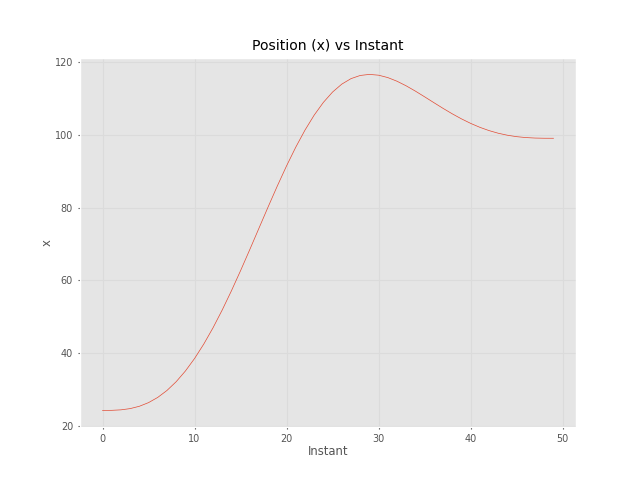

In [79]:
plt.plot(time, x)
plt.xlabel('Instant')
plt.ylabel('x')
plt.title('Position (x) vs Instant')
plt.show()

<IPython.core.display.Javascript object>


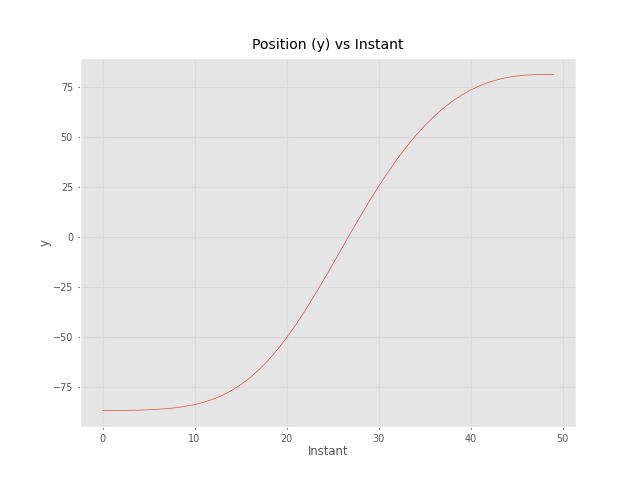

In [80]:
plt.plot(time, y)
plt.xlabel('Instant')
plt.ylabel('y')
plt.title('Position (y) vs Instant')
plt.show()

<IPython.core.display.Javascript object>


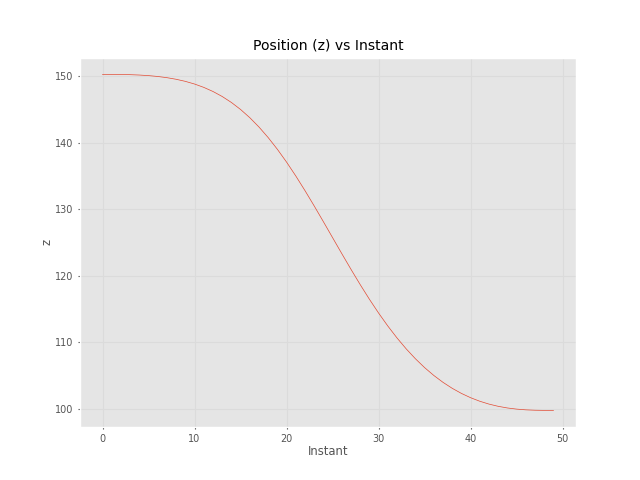

In [81]:
plt.plot(time, z)
plt.xlabel('Instant')
plt.ylabel('z')
plt.title('Position (z) vs Instant')
plt.show()

<IPython.core.display.Javascript object>


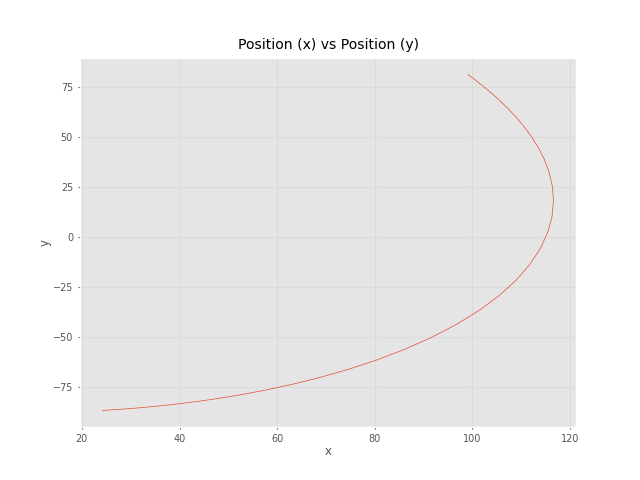

In [82]:
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Position (x) vs Position (y)')
plt.show()

<IPython.core.display.Javascript object>


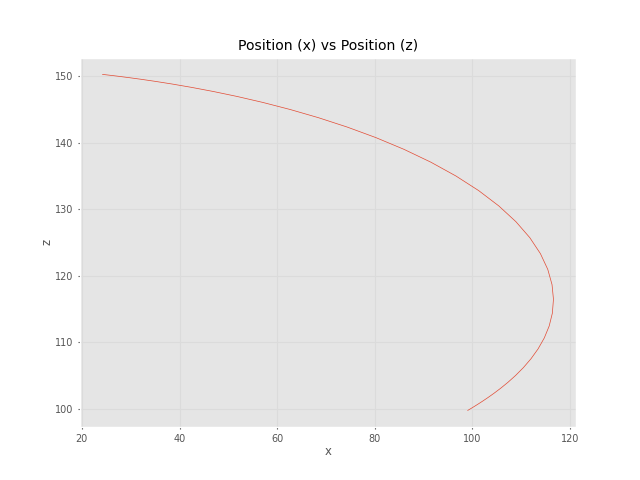

In [83]:
plt.plot(x, z)
plt.xlabel('x')
plt.ylabel('z')
plt.title('Position (x) vs Position (z)')
plt.show()

In [85]:
##Cartesian based
from spatialmath import SE3

qinit = qt1.q[0]    #create the homegenus matrix ( initial position)
matrix1 = robot1.fkine(qinit)
print(qinit)
print(matrix1)

qend = qt1.q[50-1]    #create the homegenus matrix ( initial position)
matrix2 = robot1.fkine(qend)
print(qend)
print(matrix2)

qt2 = rtb.ctraj(matrix1, matrix2, 50)
qt2


[0. 0. 0. 0. 0. 0. 0. 0.]
   0         1         0         24.24     
   0         0        -1        -86.92     
  -1         0         0         150.2     
   0         0         0         1         

[1.04719755 0.78539816 0.17453293 0.         0.62831853 0.78539816
 1.04719755 0.        ]
  -0.9067   -0.05055   0.4187    99.03     
   0.1403    0.9001    0.4124    81.34     
  -0.3978    0.4327   -0.8091    99.73     
   0         0         0         1         



0:
   0         1         0         24.24     
   0         0        -1        -86.92     
  -1         0         0         150.2     
   0         0         0         1         
1:
  -0.0005605  1         0.001557  24.31     
   0.00112   0.001557 -1        -86.76     
  -1        -0.0005587 -0.001121  150.2     
   0         0         0         1         
2:
  -0.002252  1         0.006223  24.52     
   0.004476  0.006233 -1        -86.29     
  -1        -0.002225 -0.00449   150.1     
   0         0         0         1         
3:
  -0.005107  0.9999    0.01399   24.87     
   0.01005   0.01404  -0.9999   -85.5      
  -0.9999   -0.004966 -0.01012   149.8     
   0         0         0         1         
4:
  -0.009176  0.9996    0.02483   25.36     
   0.01782   0.02499  -0.9995   -84.4      
  -0.9998   -0.008729 -0.01804   149.5     
   0         0         0         1         
5:
  -0.01453   0.9991    0.03871   25.99     
   0.02773   0.0391   -0.9989   -82.98     
  -0.9995   

In [86]:
xc=[]
yc=[]
zc=[]
theta1c=[]
theta2c=[]
theta3c=[]
theta4c=[]
for i in range(50):
    position = qt2[i].t
    orientation = qt2[i].R
    xc.append(position[0])
    yc.append(position[1])
    zc.append(position[2])
    q_ik = robot1.ikine_LM(qt2[i])
    theta1c.append(q_ik.q[0])
    theta2c.append(q_ik.q[1])
    theta3c.append(q_ik.q[2])
    theta4c.append(q_ik.q[3])
    


<IPython.core.display.Javascript object>


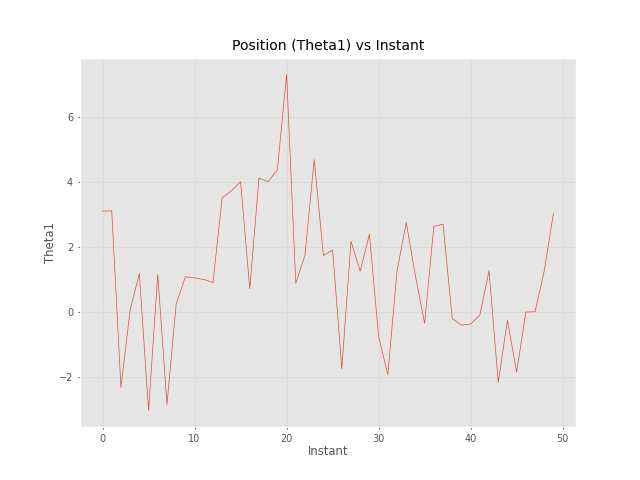

In [87]:
plt.plot(time, theta1c)
plt.xlabel('Instant')
plt.ylabel('Theta1')
plt.title('Position (Theta1) vs Instant')
plt.show()

In [24]:
plt.plot(time, theta2c)
plt.xlabel('Instant')
plt.ylabel('Theta2')
plt.title('Position (Theta2) vs Instant')
plt.show()

In [25]:
plt.plot(time, theta3c)
plt.xlabel('Instant')
plt.ylabel('Theta3')
plt.title('Position (Theta3) vs Instant')
plt.show()

In [26]:
plt.plot(time, theta4c)
plt.xlabel('Instant')
plt.ylabel('Theta4')
plt.title('Position (Theta4) vs Instant')
plt.show()

In [27]:
plt.plot(time, xc)
plt.xlabel('Instant')
plt.ylabel('x')
plt.title('Position (x) vs Instant')
plt.show()

In [28]:
plt.plot(time, yc)
plt.xlabel('Instant')
plt.ylabel('y')
plt.title('Position (y) vs Instant')
plt.show()

In [29]:
plt.plot(time, zc)
plt.xlabel('Instant')
plt.ylabel('z')
plt.title('Position (z) vs Instant')
plt.show()

In [30]:
plt.plot(xc, yc)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Position (x) vs Position (y)')
plt.show()

In [31]:
plt.plot(xc, yc)
plt.xlabel('x')
plt.ylabel('z')
plt.title('Position (x) vs Position (z)')
plt.show()